# Imports

In [28]:
from datetime import datetime

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
print(tf.__version__)

2.9.1


# Feature Engineering

In [4]:
df = pd.read_csv('TSACheckinTS.csv')
df.head(5)

,Unnamed: 0,Date,Checkins
0,99,2019-01-01,2202111
1,98,2019-01-02,2150571
2,97,2019-01-03,1975947
3,96,2019-01-04,2229391
4,95,2019-01-05,2044043


Fast Fourier Transform

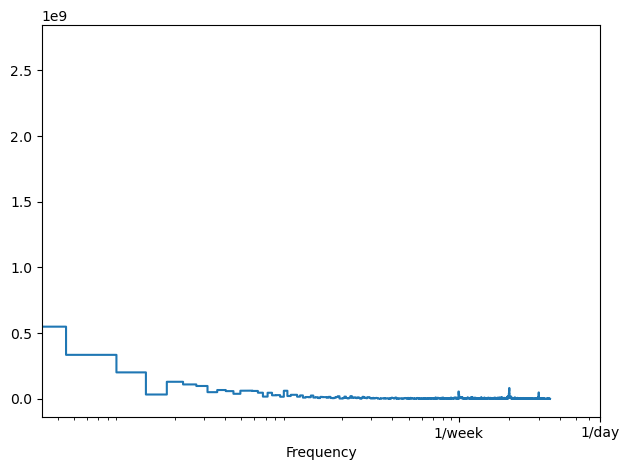

In [7]:
fft = tf.signal.rfft(df['Checkins'])
f_per_dataset = np.arange(0,len(fft))

n_sample = len(df['Checkins'])
weeks_per_dataset = n_sample / 7
f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
df.Date.describe()
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/wz/44mfxs_n0fs5bcb4z1rph6dm0000gn/T/ipykernel_33660/1102791421.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.Date.describe()


In [24]:
timestamp_s = df.Date.map(datetime.timestamp)

day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

df.head()

,Unnamed: 0,Date,Checkins,day_sin,day_cos
0,99,2019-01-01,2202111,0.965926,0.258819
1,98,2019-01-02,2150571,0.965926,0.258819
2,97,2019-01-03,1975947,0.965926,0.258819
3,96,2019-01-04,2229391,0.965926,0.258819
4,95,2019-01-05,2044043,0.965926,0.258819


# Splitting data

In [33]:
df = df.drop(['Date'], axis=1)
df.head()

,Unnamed: 0,Checkins,day_sin,day_cos
0,99,2202111,0.965926,0.258819
1,98,2150571,0.965926,0.258819
2,97,1975947,0.965926,0.258819
3,96,2229391,0.965926,0.258819
4,95,2044043,0.965926,0.258819


In [34]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

((1089, 4), (311, 4), (156, 4))

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1089 non-null   int64  
 1   Checkins    1089 non-null   int64  
 2   day_sin     1089 non-null   float64
 3   day_cos     1089 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 34.2 KB


In [36]:
scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

/var/folders/wz/44mfxs_n0fs5bcb4z1rph6dm0000gn/T/ipykernel_33660/1038120894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
/var/folders/wz/44mfxs_n0fs5bcb4z1rph6dm0000gn/T/ipykernel_33660/1038120894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
/var/folders/wz/44mfxs_n0fs5bcb4z1rph6dm0000gn/T/ipykernel_33660/1038120894.py:6: SettingWithCopyWarning: 
A value i